**<font color='#ff6f69'> Author </font>: <font color='#B5D33D'> Izan Majeed </font>**
<br>
**<font color='#ff6f69'> Email </font>: <font color='#B5D33D'> izanmajeed03@gmail.com </font>**

In [1]:
import numpy
import pandas

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
housing = pandas.read_csv("housing.csv")

## <font color='#ff6f69'> Data Frame Info </font> 

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


## <font color='#ff6f69'> Missing Values </font> 

In [7]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

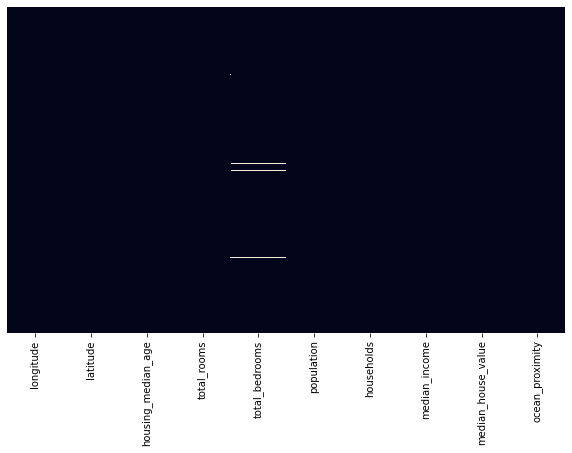

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(housing.isnull(), yticklabels=False, cbar=False)
plt.show()

## <font color='#ff6f69'> Train Test Split </font> 
**<font color='#9cd5d4'> Model will be trained on training data, create a test set and leave that to piplines </font>**

In [9]:
from sklearn.model_selection import train_test_split

### <font color='#3caea3'> Let's stratify the data on median_income </font>

In [10]:
def incom_cat_func(x):
    if x<=2.5:
        return 1
    elif x<=3.5:
        return 2
    elif x<=4.5:
        return 3
    else:
        return 4

In [11]:
housing["median_income_cat"] = housing["median_income"].apply(incom_cat_func)

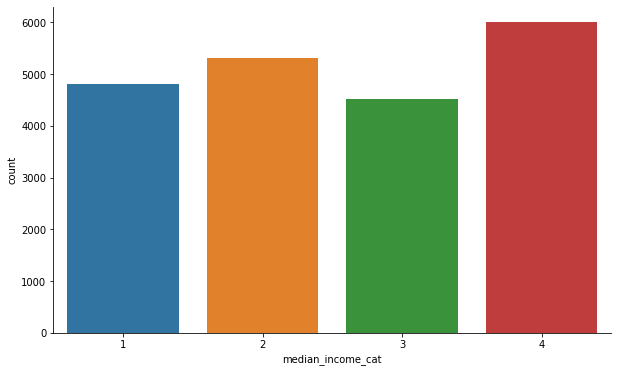

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(housing['median_income_cat'])
sns.despine()
plt.show()

In [13]:
X = housing.drop('median_income_cat', axis=1)
y = housing['median_income_cat']

train_set, test_set, y_train_cat, y_test_cat = train_test_split(X, y, test_size=0.3, stratify=y)

In [14]:
del(y_train_cat)
del(y_test_cat)

In [15]:
housing = train_set
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## <font color='#ff6f69'> Pairplot </font> 

In [16]:
sns.set_palette('husl')

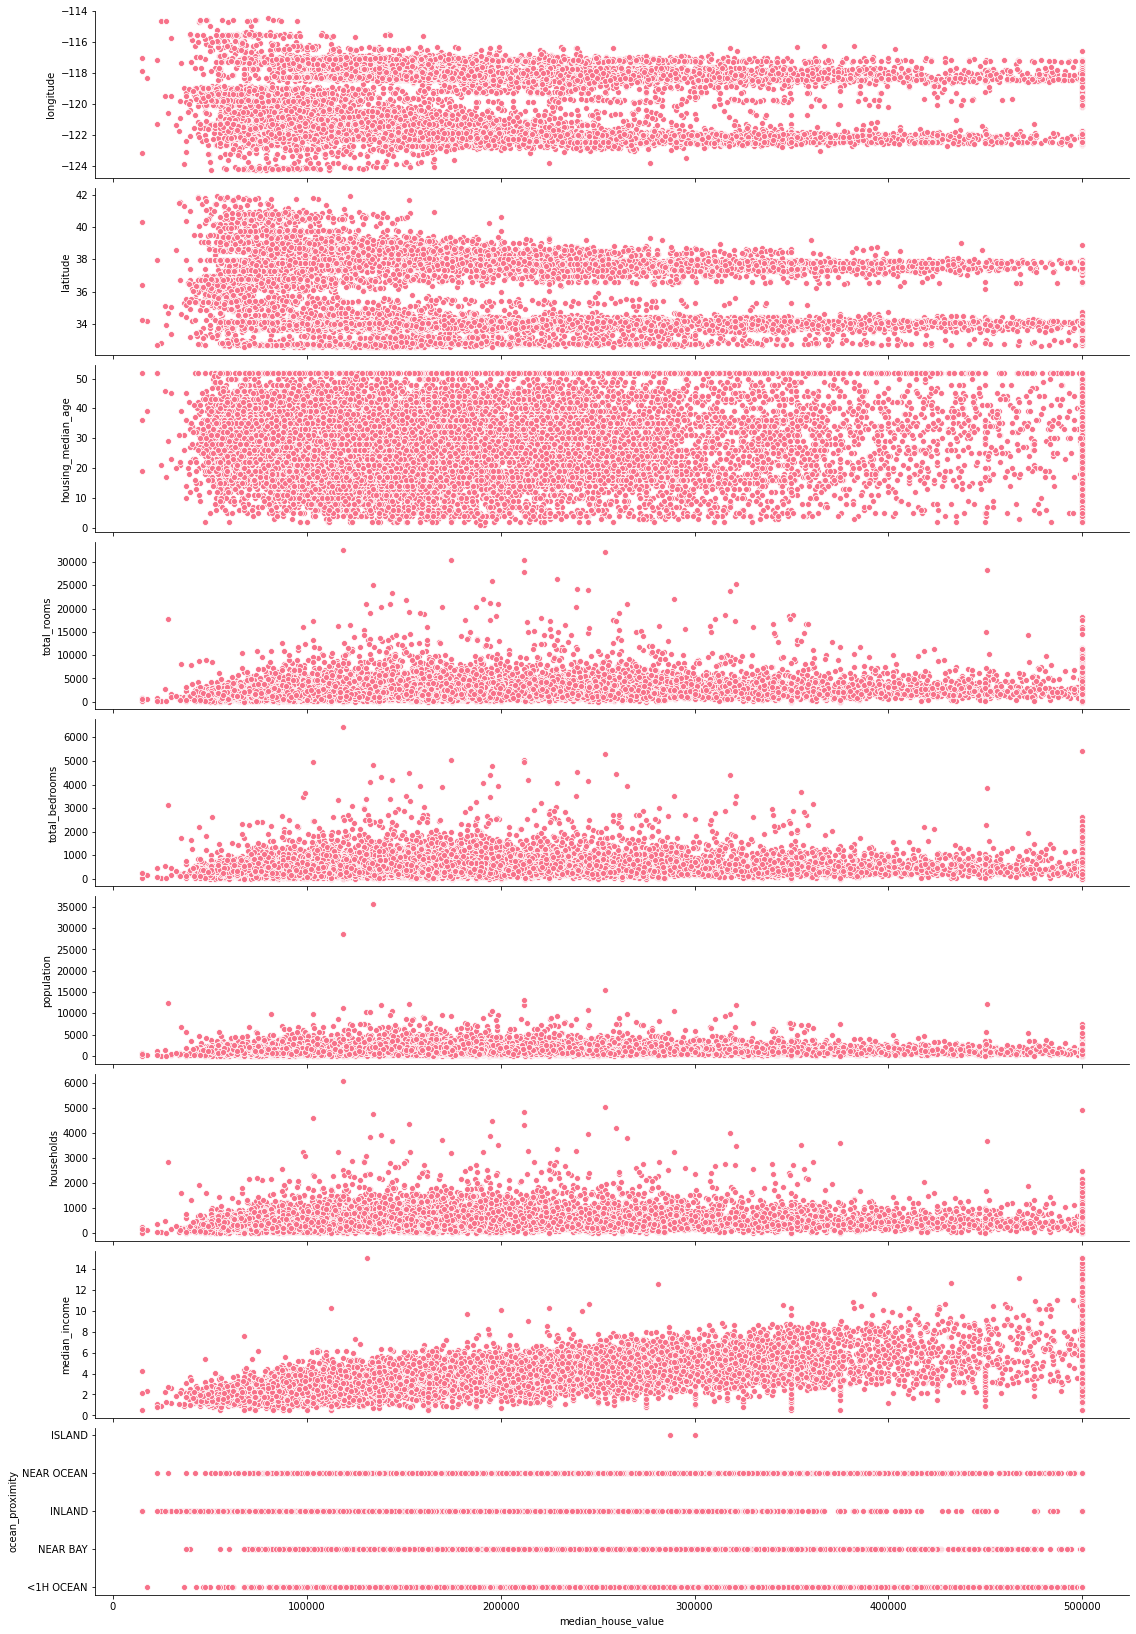

In [17]:
sns.pairplot(housing, 
             y_vars=['longitude', 'latitude',
            'housing_median_age', 'total_rooms',
            'total_bedrooms', 'population',
            'households', 'median_income',
            'ocean_proximity'],
             x_vars=['median_house_value'],
             aspect=6
            )
plt.show()

## <font color='#ff6f69'> Correlation </font> 

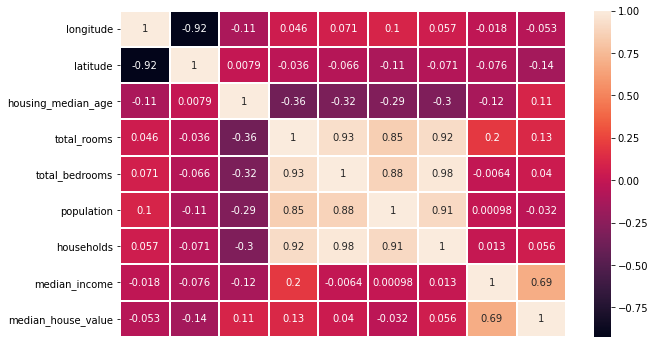

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(housing.corr(), xticklabels=False, annot=True, linecolor='white', linewidths=1)
plt.show()

## <font color='#ff6f69'> Prepare Data </font> 

In [19]:
X_train = housing.drop('median_house_value', axis=1)
y_train = housing['median_house_value']

X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value']

## <font color='#ff6f69'> Pipeline </font> 
**<font color='#3caea3'> 1. Missing Values </font>**
<br>
**<font color='#3caea3'> 2. Categorical Features </font>**
<br>
**<font color='#3caea3'> 3. Feature Scaling </font>**

In [20]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

In [23]:
class FeatureSeperator(BaseEstimator, TransformerMixin):
    def __init__(self, feat_names):
        self.feat_names = feat_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.feat_names].values

In [24]:
num_feats = ['longitude', 'latitude', 'housing_median_age',
             'total_rooms', 'total_bedrooms', 'population',
             'households', 'median_income',]

cat_feats = ['ocean_proximity']

In [25]:
num_pipeline = Pipeline([
    ('seperator', FeatureSeperator(num_feats)),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

In [26]:
cat_pipeline = Pipeline([
    ('seperator', FeatureSeperator(cat_feats)),
    ('label', OneHotEncoder(sparse=False)),
    ('pca', PCA(n_components=1))
])

In [27]:
full_pipeline = FeatureUnion([
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

In [28]:
full_pipeline.fit(X_train)
X_train_prep = full_pipeline.transform(X_train)

## <font color='#ff6f69'> Training Model </font> 

## <font color='#3caea3'> 1. Linear Regression </font>

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
linear_model = LinearRegression()

In [31]:
linear_model.fit(X_train_prep, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## <font color='#3caea3'> 2. Decision Tree Regressor </font>

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
tree_model = DecisionTreeRegressor()

In [34]:
tree_model.fit(X_train_prep, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## <font color='#3caea3'> 3. Random Forest Regressor </font>

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
forest_model = RandomForestRegressor()

In [37]:
forest_model.fit(X_train_prep, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## <font color='#ff6f69'> Evaluation using <font color='#9cd5d4'>Cross Validation</font> </font> 

In [38]:
from sklearn.model_selection import cross_val_score

## <font color='#3caea3'> 1. Linear Regression </font>

In [39]:
scores = cross_val_score(linear_model, X_train_prep, y_train, cv=10,
                        scoring='neg_mean_squared_error')

In [40]:
linear_rmse = numpy.sqrt(-scores)
linear_rmse

array([75020.83099648, 67487.38231212, 69679.63942618, 65578.69713609,
       72510.86195304, 68491.99414115, 71194.63111124, 70138.91347601,
       69709.13507793, 67255.53575412])

In [41]:
print(f'Mean: {linear_rmse.mean()}, \nStd: {linear_rmse.std()}')

Mean: 69706.76213843547, 
Std: 2606.804428430754


## <font color='#3caea3'> 2. Decision Tree Regressor </font>

In [42]:
scores = cross_val_score(tree_model, X_train_prep, y_train, cv=10,
                        scoring='neg_mean_squared_error')

In [43]:
tree_rmse = numpy.sqrt(-scores) 
tree_rmse

array([68957.77277882, 68752.51281955, 66864.44749743, 65147.04029244,
       69633.56960723, 72250.2752479 , 69943.02402975, 69817.47085894,
       70883.7043338 , 66669.72194643])

In [44]:
print(f'Mean: {tree_rmse.mean()}, \nStd: {tree_rmse.std()}')

Mean: 68891.95394122833, 
Std: 2021.2364265021808


## <font color='#3caea3'> 3. Random Forest Regressor </font>

In [45]:
scores = cross_val_score(forest_model, X_train_prep, y_train, cv=5,
                        scoring='neg_mean_squared_error')

In [46]:
forest_rmse = numpy.sqrt(-scores)
forest_rmse

array([50100.82207642, 49190.97671297, 50870.17354748, 51277.32188979,
       49912.04356021])

In [47]:
print(f'Mean: {forest_rmse.mean()}, \nStd: {forest_rmse.std()}')

Mean: 50270.26755737378, 
Std: 734.2956564447903


## <font color='#ff6f69'> Fine Tune with <font color='#9cd5d4'>Grid Search</font> </font> 

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    'n_estimators': [1, 10, 50],
    'max_features': ['auto', 2, 6, 4, 6, 8],
    'bootstrap': [False],
}

In [50]:
grid_search = GridSearchCV(forest_model, param_grid, 'neg_mean_squared_error', cv=5)

In [51]:
grid_search.fit(X_train_prep, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [52]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 50}

**<font color='#ff6f69'>Tuned Model</font>**

In [53]:
tuned_forest_model = grid_search.best_estimator_

In [54]:
tuned_forest_model.fit(X_train_prep, y_train)

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**<font color='#ff6f69'> Feature Importances </font>**

In [55]:
feature_importances = tuned_forest_model.feature_importances_
features = X_train.columns

In [56]:
sorted(zip(feature_importances, features), reverse=True)

[(0.41675800555792575, 'median_income'),
 (0.15443153634457335, 'ocean_proximity'),
 (0.12153763529268191, 'longitude'),
 (0.11489300145675838, 'latitude'),
 (0.04786193783811613, 'population'),
 (0.04597849095125888, 'housing_median_age'),
 (0.03949806589328732, 'total_rooms'),
 (0.030439631732956565, 'total_bedrooms'),
 (0.028601694932441808, 'households')]

**<font color='#ff6f69'> Cross Validation </font>**

In [57]:
scores = cross_val_score(tuned_forest_model, X_train_prep, y_train, cv=5,
                        scoring='neg_mean_squared_error')

In [58]:
rmse = numpy.sqrt(-scores)

In [59]:
print(f'Mean: {rmse.mean()}, \nStd: {rmse.std()}')

Mean: 49422.7308880668, 
Std: 757.1770783015301


## <font color='#ff6f69'> Final Evaluation on <font color='#9cd5d4'>Test set</font> </font> 

In [60]:
X_test_prep = full_pipeline.transform(X_test)

In [61]:
final_preds = tuned_forest_model.predict(X_test_prep)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
final_mse = mean_squared_error(y_test, final_preds)

In [64]:
final_rmse = numpy.sqrt(final_mse) 

In [65]:
final_rmse

48930.29443244712

In [66]:
r2_score(y_test, final_preds)

0.8185356313953648